In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [30]:
data=pd.read_csv("bugzilla.csv")
data_accross_project=pd.read_csv("columba.csv")

In [35]:
data_accross_project.head(5)
data_ap=data_accross_project
data_ap=data_ap.drop('transactionid', axis=1)
data_ap=data_ap.drop('commitdate', axis=1)

In [40]:
data_ap.head()
X_data_ap=data_ap.iloc[:,:-1]
Y_data_ap=data_ap.iloc[:,-1]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 17 columns):
transactionid    4620 non-null int64
commitdate       4620 non-null object
ns               4620 non-null int64
nm               4620 non-null int64
nf               4620 non-null int64
entropy          4620 non-null float64
la               4620 non-null float64
ld               4620 non-null float64
lt               4620 non-null float64
fix              4620 non-null int64
ndev             4620 non-null int64
pd               4620 non-null int64
npt              4620 non-null float64
exp              4620 non-null int64
rexp             4620 non-null float64
sexp             4620 non-null int64
bug              4620 non-null int64
dtypes: float64(6), int64(10), object(1)
memory usage: 613.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe613289e8>,
      dtype=object)

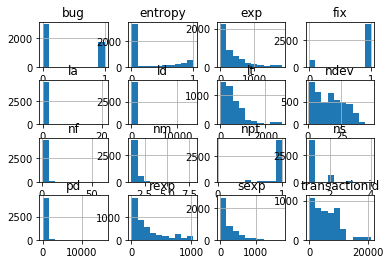

In [5]:
data.hist()

In [6]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [7]:
Y_class_count_1=data['bug'].value_counts()[1]
Y_class_count_0=data['bug'].value_counts()[0]

In [8]:
print(Y_class_count_1)
print(Y_class_count_0)

1696
2924


In [9]:
"""The data is imbalance, we have to make it balance"""

'The data is imbalance, we have to make it balance'

In [10]:
computing_bal_1=(1696/(2924+1696))*100
computing_bal_0=(2924/(2924+1696))*100

print(computing_bal_1)
print(computing_bal_0)


36.70995670995671
63.290043290043286


In [11]:
import os
import warnings
import seaborn as sns


Text(0.5, 1.0, 'Class Distributions \n 0: No bug || 1: bug')

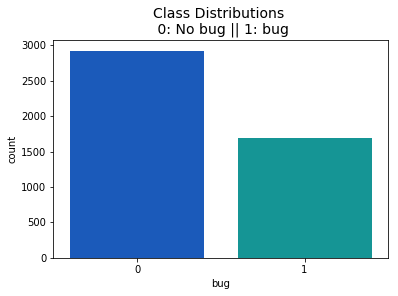

In [12]:
sns.countplot('bug', data=data, palette="winter")
plt.title('Class Distributions \n 0: No bug || 1: bug', fontsize=14)

In [13]:
sns.set(style="white", palette="PuBuGn_d", color_codes=True)

In [14]:
#checking duplicacy

data[data.duplicated()==True]

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug


In [15]:
data.shape

(4620, 17)

In [16]:
data = data.sample(frac=1)

# total bug data classes 1696 rows.
non_bug_data = data.loc[data['bug'] == 0][:1000]
bug = data.loc[data['bug'] == 1][:1000]
test_data_1=data.loc[data['bug'] == 1][1000:1696]
test_data_0 = data.loc[data['bug'] == 0][1000:-1]
pure_data = pd.concat([non_bug_data,bug])

# Shuffle dataframe rows
pure_data = pure_data.sample(frac=1, random_state=7)

pure_data.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
1733,3680,2004/3/26 10:18,1,1,1,0.000000,0.318996,0.043011,558.0,1,18,128,1.0,677,180.166667,600,1
696,1453,2000/7/19 12:05,1,1,3,0.985057,0.003704,0.001235,540.0,1,13,149,1.0,7,7.000000,7,1
527,1115,2000/5/11 12:27,1,1,1,0.000000,1.018293,0.583333,492.0,0,10,62,1.0,22,22.000000,18,0
2519,5990,2006/4/8 6:56,1,1,1,0.000000,0.003067,0.003067,326.0,1,30,2,1.0,730,356.833333,359,0
3589,9115,2004/10/23 5:04,1,1,1,0.000000,0.029126,0.000000,103.0,1,7,93,1.0,33,33.000000,11,1


In [17]:
df1 = test_data_1
df2 = test_data_0

dfs_dictionary = {'DF1':df1,'DF2':df2}
df=pd.concat(dfs_dictionary)
df.drop_duplicates(keep=False)

transactionid        commitdate  ns  nm  nf   entropy        la  \
DF1 2973           7336   2003/9/11 18:34   1   1   1  0.000000  0.189944   
    2938           7202   2002/7/24 19:38   1   1   1  0.000000  0.057143   
    389             854   2004/8/31 19:28   1   1   1  0.000000  0.037956   
    3614           9190   2006/5/22 14:11   2   2   3  0.695349  0.028544   
    4375          11166   1999/9/22 11:55   1   1   1  0.000000  0.003781   
    558            1225    2006/7/12 2:05   2   2   2  0.696212  0.030303   
    1408           2672   1998/10/27 5:43   1   1   1  0.000000  0.078431   
    4178          10596  2005/12/18 13:49   1   1   1  0.000000  0.003049   
    4526          17887   2005/2/16 11:25   1   1   1  0.000000  0.386364   
    1474           2853     2006/1/6 9:22   1   1   1  0.000000  0.000000   
    2692           6402   2002/11/7 20:35   2   2   4  0.682697  0.024404   
    4472          16430   2001/10/9 15:14   1   1   1  0.000000  0.043478   
    4145          10523  2006/11/18 10:10   1   4   7  0.701491  0.039463   
    570            1251  2005/10/11 22:08   2   2   8  0.531488  0.024237   
    1579           3089   2004/3/26 16:02   1   1   1  0.000000  0.016949   
    830            1697   2002/12/15 4:23   2   2   8  0.720757  0.031987   
    1810           3957  2005/10/18 14:47   2   2   2  0.353359  0.135338   
    726            1496   2000/1/20 16:31   1   1   5  0.573021  0.093023   
    2994           7378   2005/2/22 11:01   1   1   1  0.000000  0.016216   
    1001           1995   2004/12/27 5:16   1   1   1  0.000000  0.001558   
    3495           8903   2001/11/26 9:16   2   2   3  0.995855  0.015080   
    1944           4306   2004/7/21 17:26   1   1   1  0.000000  0.005208   
    2624           6277  2005/10/17 17:19   2   3   6  0.826168  0.019839   
    1156           2213    2001/8/31 2:08   1   1   1  0.000000  0.003012   
    414             893   2002/9/20 18:26   1   1   1  0.000000  0.090698   
    2641           6312    2005/5/6 17:40   1   1   1  0.000000  0.002836   
    2642           6314   2005/4/19 13:55   2   2   3  0.934691  0.022967   
    2728           6469   2001/8/26 18:58   1   1   1  0.000000  0.067678   
    1358           2531    2006/7/3 17:26   3   8  53  0.891911  0.018678   
    3356           8507   2003/11/2 22:20   1   1   1  0.000000  0.017341   
...                 ...               ...  ..  ..  ..       ...       ...   
DF2 1741           3702   2001/5/29 17:25   1   1   1  0.000000  0.063260   
    3501           8918    2000/7/6 21:25   2   2   2  1.000000  0.305085   
    3510           8958   2002/8/31 10:26   2   2  18  0.382932  0.118767   
    1472           2846   2006/8/19 19:02   1   1   1  0.000000  0.000000   
    3198           7941   2001/11/21 3:09   1   1   1  0.000000  0.016949   
    1212           2279   2000/4/26 15:12   1   1   1  0.000000  0.002410   
    1620           3288   2000/5/11 12:28   1   1   4  0.612671  0.525813   
    2250           5085   2001/6/30 22:00   1   1   2  1.000000  0.002090   
    3244           8112   2002/1/18 11:50   1   1   1  0.000000  0.000000   
    2110           4770   2002/5/10 19:33   1   1   1  0.000000  0.004464   
    752            1530   1999/6/14 13:37   1   1   1  0.000000  0.003650   
    3334           8436   2002/8/19 21:31   1   1   1  0.000000  0.018182   
    514            1078   2000/1/14 18:17   1   1   1  0.000000  0.002695   
    3948           9961   2006/6/19 10:38   2   2   2  1.000000  0.002275   
    2169           4915    2004/5/12 1:08   1   1   1  0.000000  0.005828   
    842            1758   2004/9/12 11:46   1   1   1  0.000000  0.039474   
    4050          10246   2002/9/28 14:59   1   1   1  0.000000  0.014493   
    1247           2368   2004/2/15 14:46   1   1   1  0.000000  0.000622   
    1920           4263    2005/11/4 5:04   1   1   1  0.000000  0.001852   
    2466           5839     2002/2/8 9:41   1   1   7  0.403876  0.172956   
    10

Distribution of the Classes in the new balanced dataset
1    0.5
0    0.5
Name: bug, dtype: float64


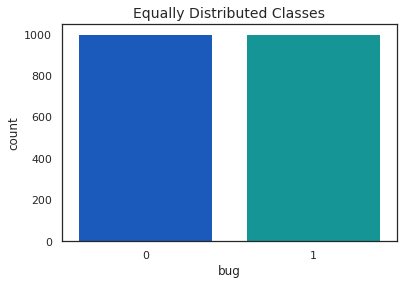

In [18]:
print('Distribution of the Classes in the new balanced dataset')
print(pure_data['bug'].value_counts()/len(pure_data))
sns.countplot('bug', data=pure_data, palette='winter')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [19]:
"""USING 1000 INSTANCE OF BOTH THE CLASSES TO MAKE THE MODEL UNDERSTAND PATTERN AND PERFORM BETTER"""

'USING 1000 INSTANCE OF BOTH THE CLASSES TO MAKE THE MODEL UNDERSTAND PATTERN AND PERFORM BETTER'

In [20]:
pure_data.describe()

,transactionid,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,5828.301500,1.187500,1.241500,2.454000,0.257224,0.077560,0.137271,595.209651,0.874500,16.501000,151.942500,0.944620,337.04100,249.043264,229.361000,0.500000
std,4329.037865,0.445469,0.587665,4.525939,0.386577,0.515726,4.209586,553.053254,0.331368,10.967093,576.252603,0.147378,384.28549,264.049423,264.035852,0.500125
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.052632,1.00000,1.000000,1.000000,0.000000
25%,2131.500000,1.000000,1.000000,1.000000,0.000000,0.003390,0.001383,218.250000,1.000000,6.750000,2.000000,1.000000,59.00000,51.375000,33.000000,0.000000
50%,5112.000000,1.000000,1.000000,1.000000,0.000000,0.011096,0.005222,463.166667,1.000000,16.000000,17.000000,1.000000,195.50000,154.000000,132.000000,0.500000
75%,8775.500000,1.000000,1.000000,2.000000,0.665524,0.039270,0.019608,796.125000,1.000000,25.000000,97.000000,1.000000,484.25000,351.500000,348.250000,1.000000
max,20937.000000,4.000000,8.000000,61.000000,1.000000,21.000000,188.000000,2744.000000,1.000000,47.000000,10034.000000,1.000000,1807.00000,1042.750000,1659.000000,1.000000


In [21]:
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark")

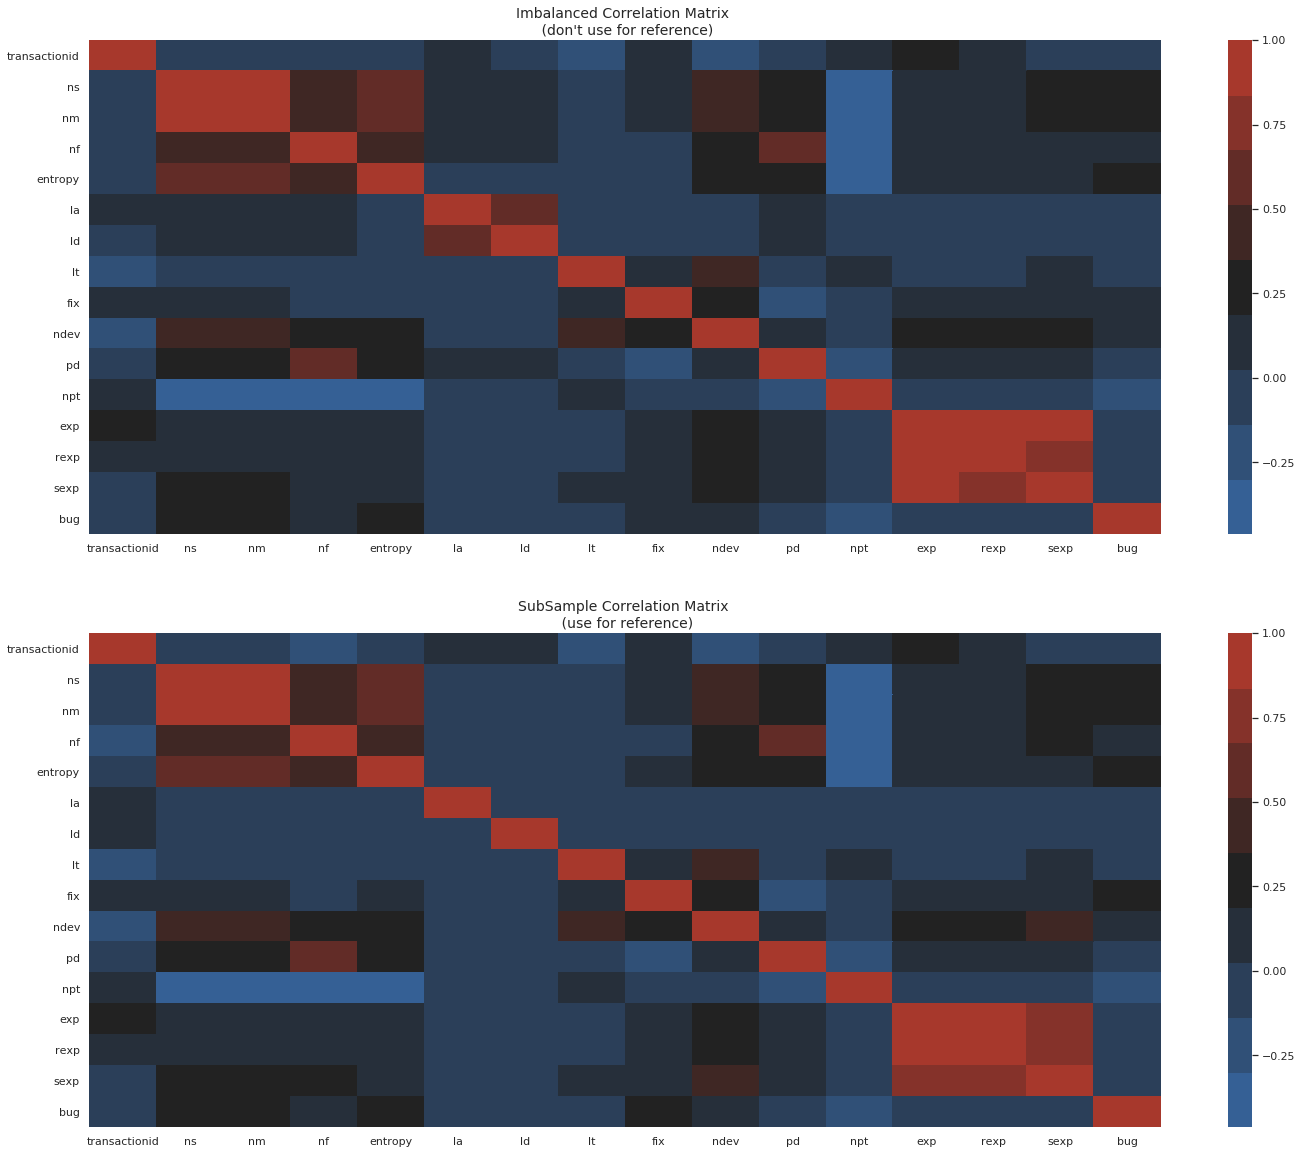

In [22]:

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap=cmap, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = pure_data.corr()
sns.heatmap(sub_sample_corr, cmap=cmap, annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Text(0.5, 1.0, 'ld vs bug distribution')

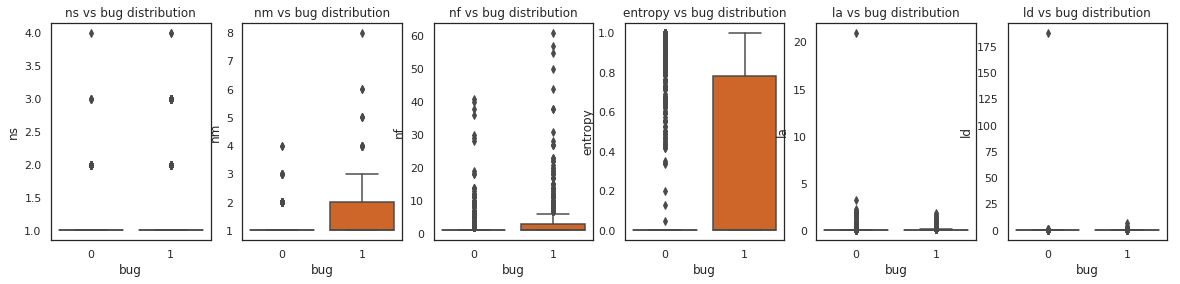

In [23]:
fig, axes = plt.subplots(ncols=6,figsize=(20,4))
sns.boxplot(x='bug',y='ns',data=pure_data, palette='Oranges', ax=axes[0])
axes[0].set_title('ns vs bug distribution')

sns.boxplot(x='bug',y='nm' ,data=pure_data, palette='Oranges', ax=axes[1])
axes[1].set_title("nm vs bug distribution")

sns.boxplot(x='bug',y='nf' ,data=pure_data, palette='Oranges', ax=axes[2])
axes[2].set_title("nf vs bug distribution")

sns.boxplot(x='bug',y='entropy' ,data=pure_data, palette='Oranges', ax=axes[3])
axes[3].set_title("entropy vs bug distribution")

sns.boxplot(x='bug',y='la' ,data=pure_data, palette='Oranges', ax=axes[4])
axes[4].set_title("la vs bug distribution")

sns.boxplot(x='bug',y='ld',data=pure_data, palette='Oranges',ax=axes[5])
axes[5].set_title("ld vs bug distribution")



Text(0.5, 1.0, 'rexp vs bug ')

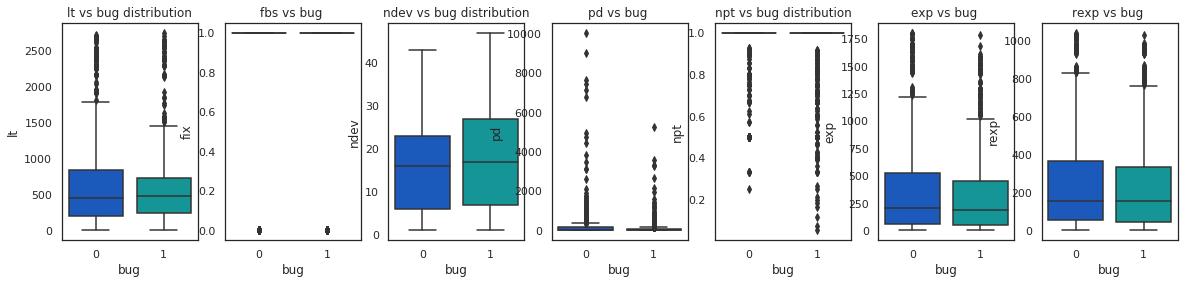

In [24]:
fig, axes = plt.subplots(ncols=7,figsize=(20,4))
sns.boxplot(x='bug',y='lt',data=pure_data, palette='winter', ax=axes[0])
axes[0].set_title('lt vs bug distribution')

sns.boxplot(x='bug',y='fix' ,data=pure_data, palette='winter', ax=axes[1])
axes[1].set_title("fbs vs bug ")

sns.boxplot(x='bug',y='ndev' ,data=pure_data, palette='winter', ax=axes[2])
axes[2].set_title("ndev vs bug distribution")

sns.boxplot(x='bug',y='pd' ,data=pure_data, palette='winter', ax=axes[3])
axes[3].set_title("pd vs bug ")

sns.boxplot(x='bug',y='npt' ,data=pure_data, palette='winter', ax=axes[4])
axes[4].set_title("npt vs bug distribution")

sns.boxplot(x='bug',y='exp' ,data=pure_data, palette='winter', ax=axes[5])
axes[5].set_title("exp vs bug ")

sns.boxplot(x='bug',y='rexp' ,data=pure_data, palette='winter', ax=axes[6])
axes[6].set_title("rexp vs bug ")



/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 's_experience Distirbution \n (No bug)')

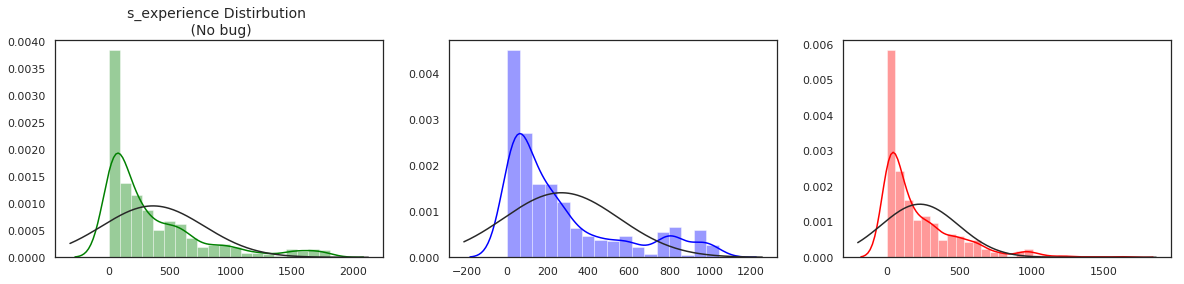

In [25]:
from scipy.stats import norm

f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
exp_n=pure_data['exp'].loc[pure_data['bug']==0].values
sns.distplot(exp_n,ax=ax1,fit=norm,color='g')
ax1.set_title("experience Distirbution \n (No bug)", fontsize='14')

rexp_n=pure_data['rexp'].loc[pure_data['bug']==0].values
sns.distplot(rexp_n,ax=ax2,fit=norm,color='b')
ax1.set_title("r_experience Distirbution \n (No bug)", fontsize='14')

sexp_n=pure_data['sexp'].loc[pure_data['bug']==0].values
sns.distplot(sexp_n,ax=ax3,fit=norm,color='r')
ax1.set_title("s_experience Distirbution \n (No bug)", fontsize='14')



In [26]:
X_pure=pure_data.iloc[:,:-1]
Y_pure=pure_data.iloc[:,-1]
X_pure=X_pure.drop("transactionid", axis=1)
X_pure=X_pure.drop("commitdate",axis=1)


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_pure,Y_pure,test_size=0.2,random_state=20)

In [27]:
X_pure.head()

,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp
1733,1,1,1,0.000000,0.318996,0.043011,558.0,1,18,128,1.0,677,180.166667,600
696,1,1,3,0.985057,0.003704,0.001235,540.0,1,13,149,1.0,7,7.000000,7
527,1,1,1,0.000000,1.018293,0.583333,492.0,0,10,62,1.0,22,22.000000,18
2519,1,1,1,0.000000,0.003067,0.003067,326.0,1,30,2,1.0,730,356.833333,359
3589,1,1,1,0.000000,0.029126,0.000000,103.0,1,7,93,1.0,33,33.000000,11


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
Y_pred_ap=model.predict(X_data_ap)
accuracy_ap=accuracy_score(Y_pred_ap,Y_data_ap)
print("Accuracy for the test data: ",accuracy)
print("Accuracy for the  across project data: ",accuracy_ap)


Accuracy for the test data:  0.7075
Accuracy for the  across project data:  0.6888888888888889


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [44]:
model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
cm=confusion_matrix(Y_test.tolist(),Y_pred.tolist())
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision Score :",precision_score(Y_test,Y_pred))
print("f1 Score :",f1_score(Y_test,Y_pred))
print("Confusion Matrix: \n",cm)


Y_pred_ap=model.predict(X_data_ap)
accuracy_ap=accuracy_score(Y_pred_ap,Y_data_ap)
print("Accuracy for the test data: ",accuracy)
print("Accuracy for the  across project data: ",accuracy_ap)
cm2=confusion_matrix(Y_data_ap.tolist(),Y_pred_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,Y_pred_ap))
print("Precision Score :",precision_score(Y_data_ap,Y_pred_ap))
print("f1 Score :",f1_score(Y_data_ap,Y_pred_ap))
print("Confusion Matrix: \n",cm2)



Accuracy: 0.71
Precision Score : 0.7701149425287356
f1 Score : 0.6979166666666666
Confusion Matrix: 
 [[150  40]
 [ 76 134]]
Accuracy for the test data:  0.7075
Accuracy for the  across project data:  0.6754208754208754
For the data across project 
Accuracy: 0.6754208754208754
Precision Score : 0.4519774011299435
f1 Score : 0.3561887800534283
Confusion Matrix: 
 [[2609  485]
 [ 961  400]]


In [45]:
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)


print("==============================")
print("Evaluation for the across project")
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6637168141592921
Specificity :  0.7701149425287356
Evaluation for the across project
Sensitivity :  0.730812324929972
Specificity :  0.4519774011299435


In [93]:
X_pure.shape

(2000, 14)

In [77]:
model=Sequential()
model.add(Dense(128, init="uniform", input_dim=14, activation='relu'))
model.add(Dense(64, init ="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer='adam')
model.summary()
history=model.fit(X_train,Y_train, epochs=100, batch_size=100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1600/1600 [==============================] - 0s 121us/step - loss: 0.8818 - acc: 0.5344
Epoch 2/100
1600/1600 [==============================] - 0s 18us/step - loss: 0.6993 - acc: 0.5456
Epoch 3/100
1600/1600 [==============================] - 0s 19us/step - loss: 0.6809 - acc: 0.5581
Epoch 4/100
1600/1600 [==============================] - 0s 18us/step - loss: 0.67

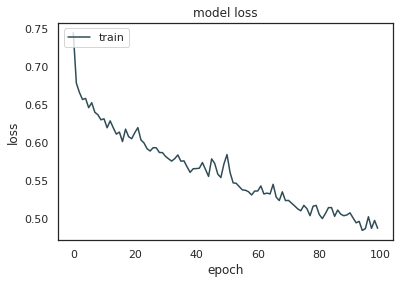

In [49]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
y_pred_ap=model.predict(X_data_ap)
y_pred_ap=(y_pred_ap>0.5)

0.6275


In [48]:
model.evaluate(X_test,Y_test)
model.evaluate(X_data_ap,Y_pred_ap)

4455/4455 [==============================] - 0s 26us/step


[2.2884747119329862, 0.522109988783345]

In [86]:
cm=confusion_matrix(Y_test.tolist(),y_pred.tolist())
print("Accuracy:",accuracy_score(Y_test,y_pred))
print("Precision Score :",precision_score(Y_test,y_pred))
print("f1 Score :",f1_score(Y_test,y_pred))
print("Confusion Matrix: \n",cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

print("==========================")
print("Evalutation across projects")

accuracy_ap=accuracy_score(y_pred_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_ap)
cm2=confusion_matrix(Y_data_ap.tolist(),y_pred_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_pred_ap))
print("Precision Score :",precision_score(Y_data_ap,y_pred_ap))
print("f1 Score :",f1_score(Y_data_ap,y_pred_ap))
print("Confusion Matrix: \n",cm2)


total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specifity : ', specificity )

Accuracy: 0.6275
Precision Score : 0.6177606177606177
f1 Score : 0.6823027718550105
Confusion Matrix: 
 [[ 91  99]
 [ 50 160]]
Sensitivity :  0.6453900709219859
Specificity :  0.6177606177606177
Evalutation across projects
Accuracy for the  across project data:  0.5322109988776655
For the data across project 
Accuracy: 0.5322109988776655
Precision Score : 0.3289162328442972
f1 Score : 0.4001151410477835
Confusion Matrix: 
 [[1676 1418]
 [ 666  695]]
Sensitivity :  0.7156276686592656
Specifity :  0.3289162328442972


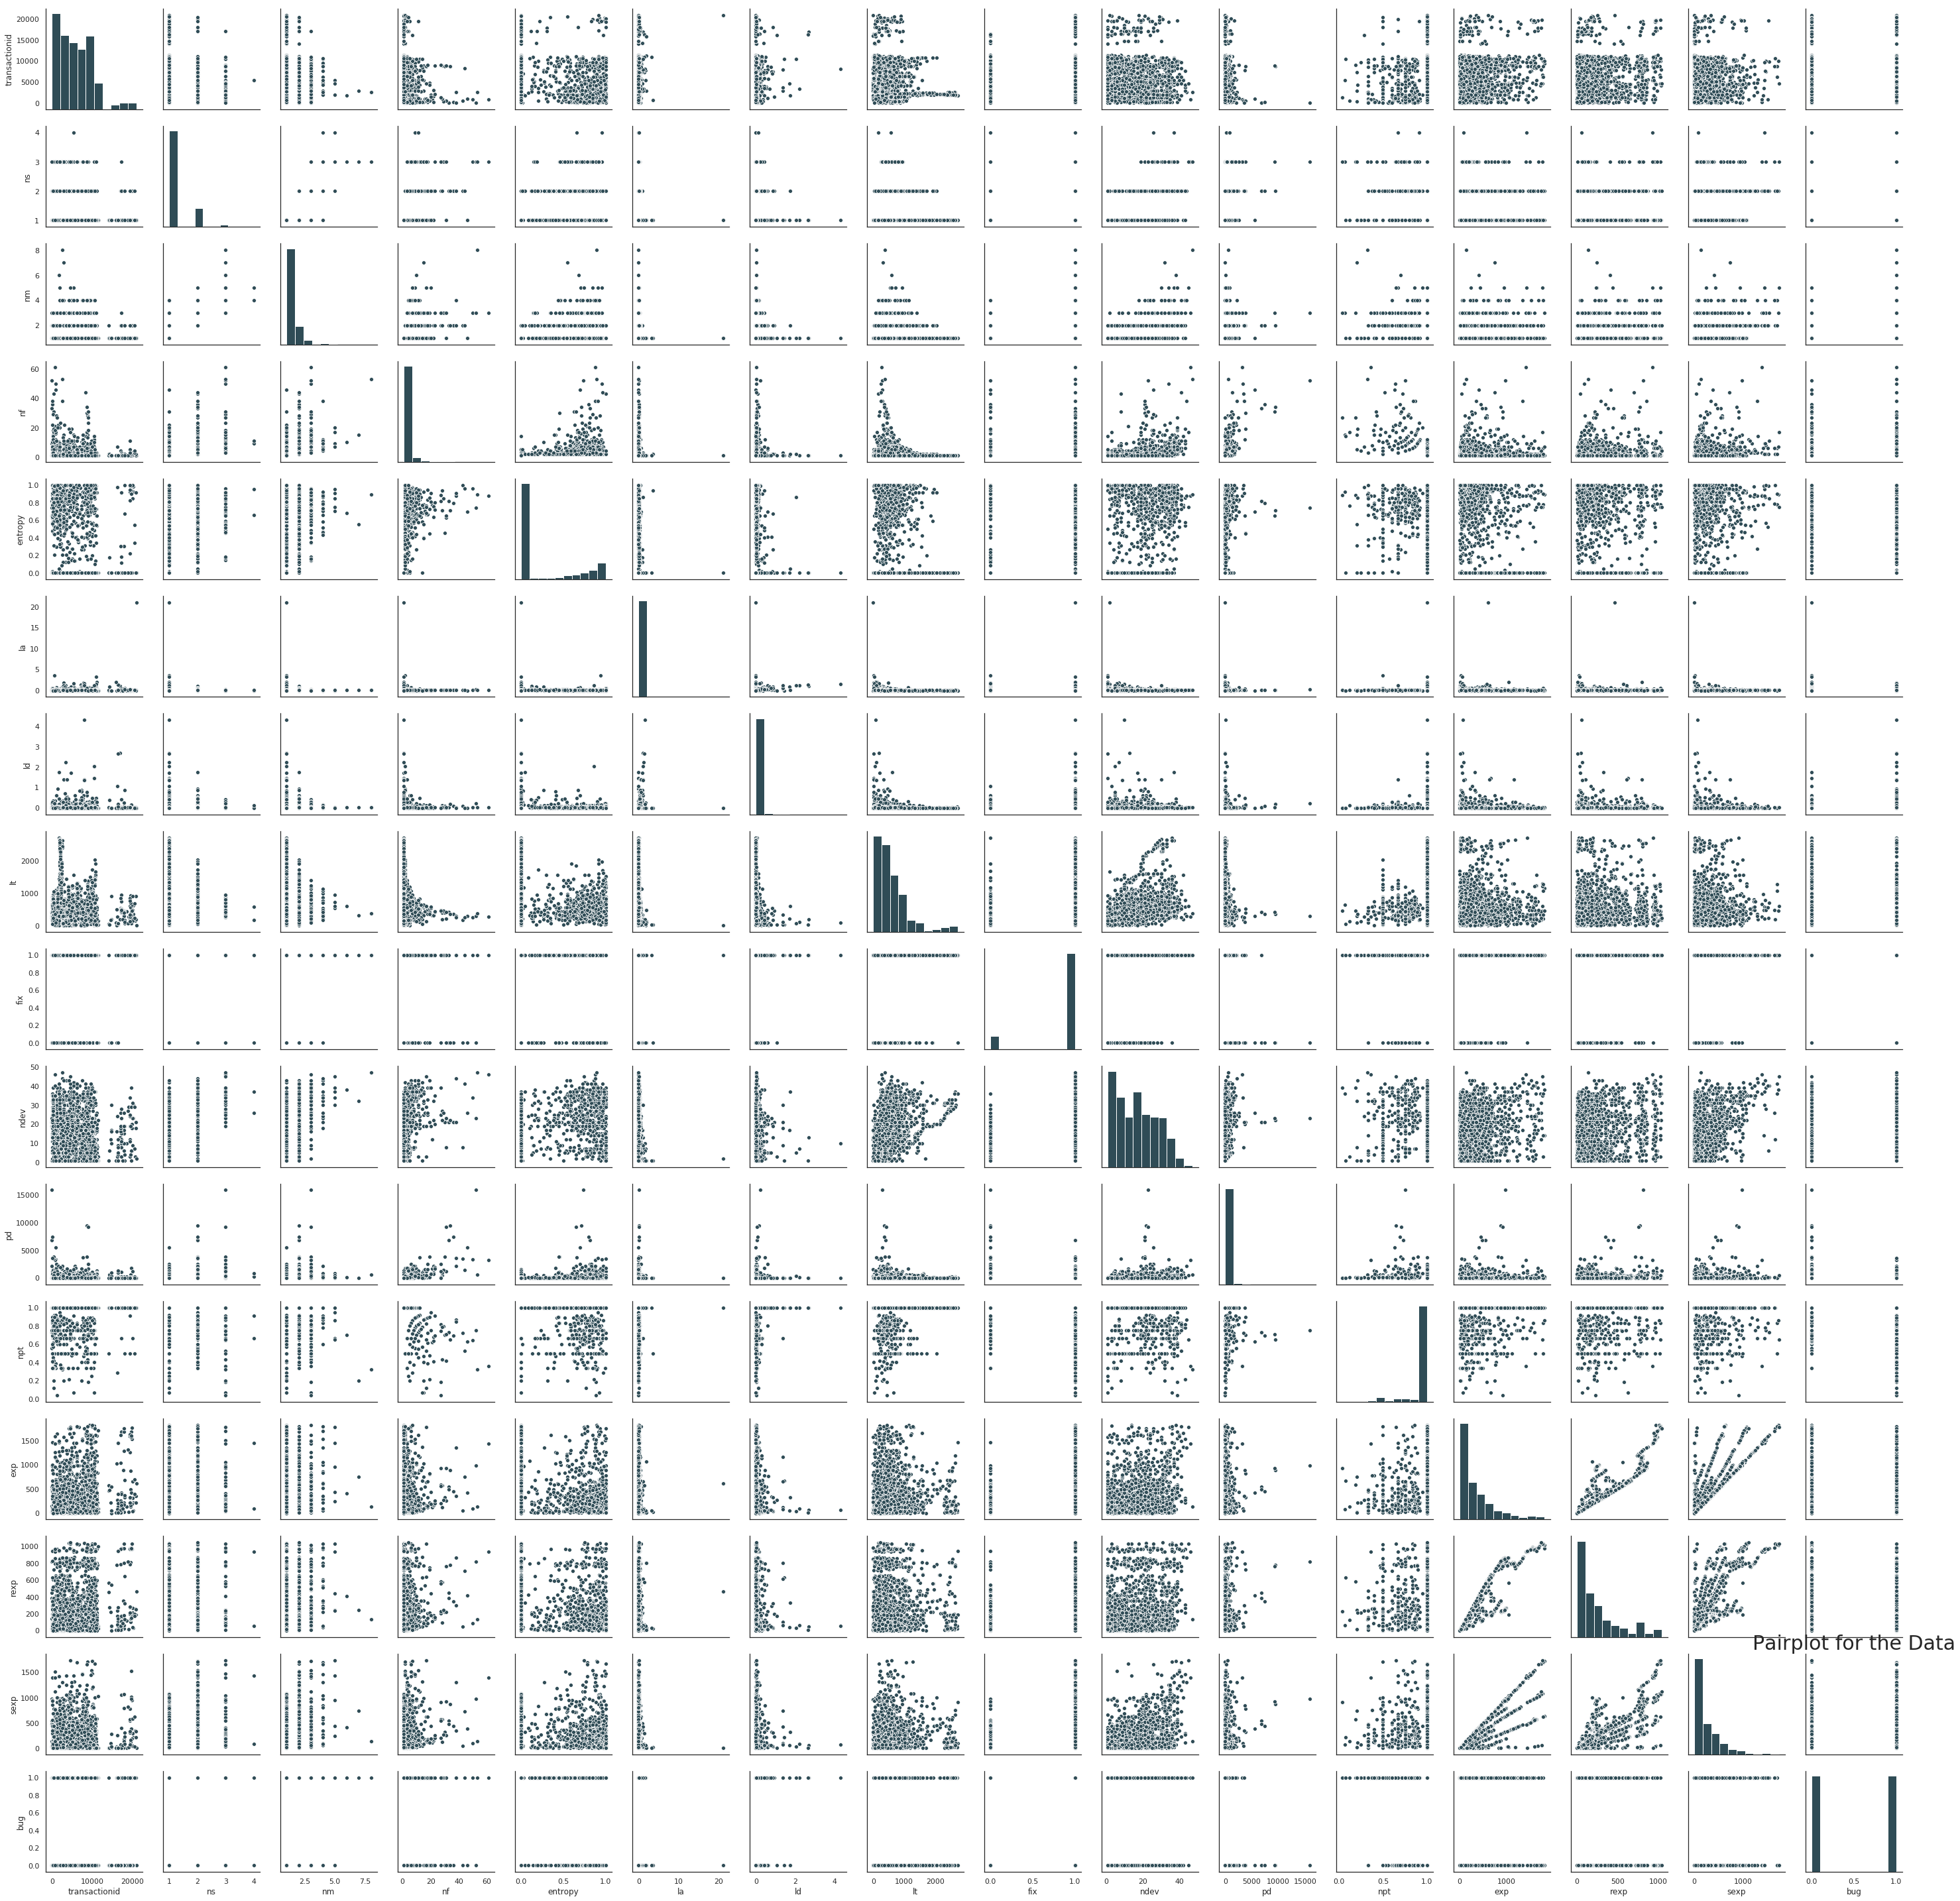

In [56]:
sns.pairplot(pure_data)
plt.title('Pairplot for the Data', fontsize = 30)
plt.show()

In [ ]:
#USING THE KMEANS TECHNIQUE TO PREDICT 

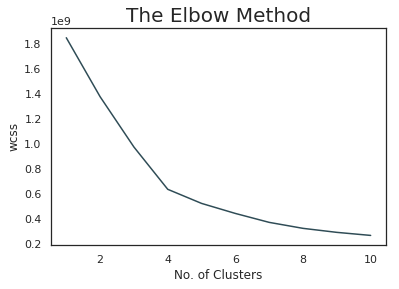

In [50]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X_pure)           #Data with balance class
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#We are not using the elbow value for the number of centroids, since the known classes are already known

In [51]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(X_train)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [53]:
y_predict_km=km.predict(X_test)
y_predict_km_ap=km.predict(X_data_ap)
accuracy_ap=accuracy_score(y_predict_km_ap,Y_data_ap)

In [54]:
accuracy_score_km=accuracy_score(Y_test,y_predict_km)
print(accuracy_score_km)
print(accuracy_ap)

0.4775
0.6962962962962963


In [55]:
cm=confusion_matrix(Y_test.tolist(),y_predict_km.tolist())
print("Accuracy:",accuracy_score(Y_test,y_predict_km))
print("Precision Score :",precision_score(Y_test,y_predict_km))
print("f1 Score :",f1_score(Y_test,y_predict_km))
print("Confusion Matrix: \n",cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)



print("==========================")
print("Evalutation across projects")

accuracy_ap=accuracy_score(y_predict_km_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_ap)
cm2=confusion_matrix(Y_data_ap.tolist(),y_predict_km_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_predict_km_ap))
print("Precision Score :",precision_score(Y_data_ap,y_predict_km_ap))
print("f1 Score :",f1_score(Y_data_ap,y_predict_km_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)


Accuracy: 0.4775
Precision Score : 1.0
f1 Score : 0.009478672985781991
Confusion Matrix: 
 [[190   0]
 [209   1]]
Sensitivity :  0.47619047619047616
Specificity :  1.0
Evalutation across projects
Accuracy for the  across project data:  0.6962962962962963
For the data across project 
Accuracy: 0.6962962962962963
Precision Score : 0.5178571428571429
f1 Score : 0.14637223974763408
Confusion Matrix: 
 [[2986  108]
 [1245  116]]
Sensitivity :  0.7057433230914677
Specificity :  0.5178571428571429


In [56]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
Y_pred_naive=gnb.predict(X_test)
Y_pred_naive_ap=gnb.predict(X_data_ap)

In [58]:
cm=confusion_matrix(Y_test.tolist(),Y_pred_naive.tolist())
print("Accuracy:",accuracy_score(Y_test,Y_pred_naive))
print("Precision Score :",precision_score(Y_test,Y_pred_naive))
print("f1 Score :",f1_score(Y_test,Y_pred_naive))
print("Confusion Matrix: \n",cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)


print("==========================")
print("Evalutation across projects")

accuracy_ap=accuracy_score(Y_pred_naive_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_ap)
cm2=confusion_matrix(Y_data_ap.tolist(),Y_pred_naive_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,Y_pred_naive_ap))
print("Precision Score :",precision_score(Y_data_ap,Y_pred_naive_ap))
print("f1 Score :",f1_score(Y_data_ap,Y_pred_naive_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)




Accuracy: 0.5775
Precision Score : 0.5597667638483965
f1 Score : 0.694394213381555
Confusion Matrix: 
 [[ 39 151]
 [ 18 192]]
Sensitivity :  0.6842105263157895
Specificity :  0.5597667638483965
Evalutation across projects
Accuracy for the  across project data:  0.6828282828282828
For the data across project 
Accuracy: 0.6828282828282828
Precision Score : 0.4726315789473684
f1 Score : 0.38857637386412813
Confusion Matrix: 
 [[2593  501]
 [ 912  449]]
Sensitivity :  0.7398002853067047
Specificity :  0.4726315789473684


In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_pred_svm = clf.predict(X_test)

In [61]:
cm=confusion_matrix(Y_test.tolist(),y_pred_svm.tolist())
print("Accuracy:",accuracy_score(Y_test,y_pred_svm))
print("Precision Score :",precision_score(Y_test,y_pred_svm))
print("f1 Score :",f1_score(Y_test,y_pred_svm))
print("Confusion Matrix: \n",cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

print("==========================")
print("Evalutation across projects")
y_pred_svm_ap=clf.predict(X_data_ap)
accuracy_ap_svm=accuracy_score(y_pred_svm_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_ap_svm)
cm2=confusion_matrix(Y_data_ap.tolist(),y_pred_svm_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_pred_svm_ap))
print("Precision Score :",precision_score(Y_data_ap,y_pred_svm_ap))
print("f1 Score :",f1_score(Y_data_ap,y_pred_svm_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)

Accuracy: 0.655
Precision Score : 0.6551724137931034
f1 Score : 0.6877828054298643
Confusion Matrix: 
 [[110  80]
 [ 58 152]]
Sensitivity :  0.6547619047619048
Specificity :  0.6551724137931034
Evalutation across projects
Accuracy for the  across project data:  0.588327721661055
For the data across project 
Accuracy: 0.588327721661055
Precision Score : 0.38974358974358975
f1 Score : 0.4768967484312607
Confusion Matrix: 
 [[1785 1309]
 [ 525  836]]
Sensitivity :  0.7727272727272727
Specificity :  0.38974358974358975


In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf')
clf.fit(X_train,Y_train)
y_pred_svm_rbf = clf.predict(X_test)

In [65]:
cm=confusion_matrix(Y_test.tolist(),y_pred_svm_rbf.tolist())
print("Accuracy:",accuracy_score(Y_test,y_pred_svm_rbf))
print("Precision Score :",precision_score(Y_test,y_pred_svm_rbf))
print("f1 Score :",f1_score(Y_test,y_pred_svm_rbf))
print("Confusion Matrix: \n",cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)




print("==========================")
print("Evalutation across projects")
y_pred_svm_rbf_ap=clf.predict(X_data_ap)
accuracy_ap_svm=accuracy_score(y_pred_svm_rbf_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_ap_svm)
cm2=confusion_matrix(Y_data_ap.tolist(),y_pred_svm_rbf_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_pred_svm_rbf_ap))
print("Precision Score :",precision_score(Y_data_ap,y_pred_svm_rbf_ap))
print("f1 Score :",f1_score(Y_data_ap,y_pred_svm_rbf_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)

Accuracy: 0.4725
Precision Score : 0.4
f1 Score : 0.018604651162790697
Confusion Matrix: 
 [[187   3]
 [208   2]]
Sensitivity :  0.47341772151898737
Specificity :  0.4
Evalutation across projects
Accuracy for the  across project data:  0.6942760942760943
For the data across project 
Accuracy: 0.6942760942760943
Precision Score : 0.4
f1 Score : 0.002928257686676427
Confusion Matrix: 
 [[3091    3]
 [1359    2]]
Sensitivity :  0.6946067415730337
Specificity :  0.4


In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,Y_train)
y_pred_lr=clf.predict(X_test)

In [67]:
cm=confusion_matrix(Y_test.tolist(),y_pred_lr.tolist())
print("Accuracy:",accuracy_score(Y_test,y_pred_lr))
print("Precision Score :",precision_score(Y_test,y_pred_lr))
print("f1 Score :",f1_score(Y_test,y_pred_lr))
print("Confusion Matrix: \n",cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)



print("==========================")
print("Evalutation across projects")
y_pred_lr_ap=clf.predict(X_data_ap)
accuracy_ap_svm=accuracy_score(y_pred_lr_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_ap_svm)
cm2=confusion_matrix(Y_data_ap.tolist(),y_pred_lr_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_pred_lr_ap))
print("Precision Score :",precision_score(Y_data_ap,y_pred_lr_ap))
print("f1 Score :",f1_score(Y_data_ap,y_pred_lr_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)

Accuracy: 0.655
Precision Score : 0.6714285714285714
f1 Score : 0.6714285714285714
Confusion Matrix: 
 [[121  69]
 [ 69 141]]
Sensitivity :  0.6368421052631579
Specificity :  0.6714285714285714
Evalutation across projects
Accuracy for the  across project data:  0.6303030303030303
For the data across project 
Accuracy: 0.6303030303030303
Precision Score : 0.423773987206823
f1 Score : 0.49119555143651533
Confusion Matrix: 
 [[2013 1081]
 [ 566  795]]
Sensitivity :  0.7805350911205894
Specificity :  0.423773987206823


In [68]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,Y_train)
y_pred_ada=clf.predict(X_test)

In [69]:
cm=confusion_matrix(Y_test.tolist(),y_pred_ada.tolist())
print("Accuracy:",accuracy_score(Y_test,y_pred_ada))
print("Precision Score :",precision_score(Y_test,y_pred_ada))
print("f1 Score :",f1_score(Y_test,y_pred_ada))
print("Confusion Matrix: \n",cm)


total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)



print("==========================")
print("Evalutation across projects")
y_pred_ada_ap=clf.predict(X_data_ap)
accuracy_ada_ap=accuracy_score(y_pred_ada_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_ada_ap)
cm2=confusion_matrix(Y_data_ap.tolist(),y_pred_ada_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_pred_ada_ap))
print("Precision Score :",precision_score(Y_data_ap,y_pred_ada_ap))
print("f1 Score :",f1_score(Y_data_ap,y_pred_ada_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)


Accuracy: 0.69
Precision Score : 0.7171717171717171
f1 Score : 0.696078431372549
Confusion Matrix: 
 [[134  56]
 [ 68 142]]
Sensitivity :  0.6633663366336634
Specificity :  0.7171717171717171
Evalutation across projects
Accuracy for the  across project data:  0.6808080808080809
For the data across project 
Accuracy: 0.6808080808080809
Precision Score : 0.476078431372549
f1 Score : 0.46054628224582705
Confusion Matrix: 
 [[2426  668]
 [ 754  607]]
Sensitivity :  0.7628930817610063
Specificity :  0.476078431372549


In [70]:
from xgboost import XGBClassifier

In [71]:
model = XGBClassifier()
model.fit(X_train, Y_train)
Y_pred_xg=model.predict(X_test)

In [72]:
cm=confusion_matrix(Y_test.tolist(),Y_pred_xg.tolist())
print("Accuracy:",accuracy_score(Y_test,Y_pred_xg))
print("Precision Score :",precision_score(Y_test,Y_pred_xg))
print("f1 Score :",f1_score(Y_test,Y_pred_xg))
print("Confusion Matrix: \n",cm)


total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)


print("==========================")
print("Evalutation across projects")
y_pred_xg_ap=model.predict(X_data_ap)
accuracy_xg_ap=accuracy_score(y_pred_xg_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_xg_ap)
cm2=confusion_matrix(Y_data_ap.tolist(),y_pred_xg_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_pred_xg_ap))
print("Precision Score :",precision_score(Y_data_ap,y_pred_xg_ap))
print("f1 Score :",f1_score(Y_data_ap,y_pred_xg_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)


Accuracy: 0.7
Precision Score : 0.7393617021276596
f1 Score : 0.6984924623115578
Confusion Matrix: 
 [[141  49]
 [ 71 139]]
Sensitivity :  0.6650943396226415
Specificity :  0.7393617021276596
Evalutation across projects
Accuracy for the  across project data:  0.6823793490460157
For the data across project 
Accuracy: 0.6823793490460157
Precision Score : 0.45714285714285713
f1 Score : 0.28930185836263184
Confusion Matrix: 
 [[2752  342]
 [1073  288]]
Sensitivity :  0.7194771241830066
Specificity :  0.45714285714285713


In [74]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_pred_tree=clf.predict(X_test)

In [75]:
cm=confusion_matrix(Y_test.tolist(),y_pred_tree.tolist())
print("Accuracy:",accuracy_score(Y_test,y_pred_tree))
print("Precision Score :",precision_score(Y_test,y_pred_tree))
print("f1 Score :",f1_score(Y_test,y_pred_tree))
print("Confusion Matrix: \n",cm)


total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)


print("==========================")
print("Evalutation across projects")
y_pred_tree_ap=model.predict(X_data_ap)
accuracy_tree_ap=accuracy_score(y_pred_tree_ap,Y_data_ap)
print("Accuracy for the  across project data: ",accuracy_tree_ap)
cm2=confusion_matrix(Y_data_ap.tolist(),y_pred_tree_ap.tolist())
print("For the data across project ")
print("Accuracy:",accuracy_score(Y_data_ap,y_pred_tree_ap))
print("Precision Score :",precision_score(Y_data_ap,y_pred_tree_ap))
print("f1 Score :",f1_score(Y_data_ap,y_pred_tree_ap))
print("Confusion Matrix: \n",cm2)
total=sum(sum(cm2))
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Specificity : ', specificity)



Accuracy: 0.66
Precision Score : 0.6813725490196079
f1 Score : 0.6714975845410628
Confusion Matrix: 
 [[125  65]
 [ 71 139]]
Sensitivity :  0.6377551020408163
Specificity :  0.6813725490196079
Evalutation across projects
Accuracy for the  across project data:  0.6823793490460157
For the data across project 
Accuracy: 0.6823793490460157
Precision Score : 0.45714285714285713
f1 Score : 0.28930185836263184
Confusion Matrix: 
 [[2752  342]
 [1073  288]]
Sensitivity :  0.7194771241830066
Specificity :  0.45714285714285713
